# Checking distributions

In [1]:
import Simulator
import Statistics

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [3]:
timestamp = "2021_08_08-14_28_24"

grid, simulator = Simulator.from_file(timestamp)

## Checking distance matrix

Text(0.5, 1.0, 'Distance from (0,0) - rowwise reshaped')

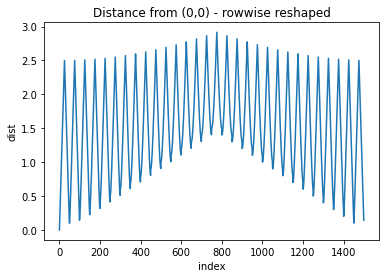

In [4]:
plt.plot(grid.dist_mat[0,:])
plt.xlabel("index")
plt.ylabel("dist")
plt.title("Distance from (0,0) - rowwise reshaped")

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [5]:
statistics = Statistics.Statistics(simulator)

Please remember to set priors!


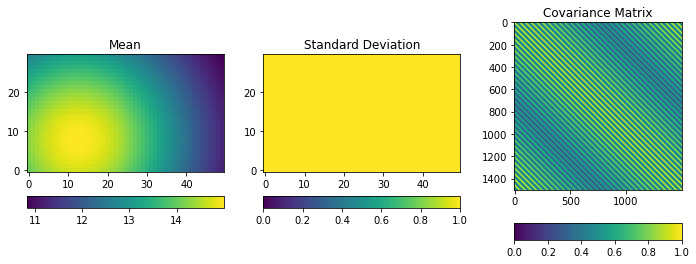

In [6]:
prior_args = Statistics.prior_args_from_file(timestamp)
statistics.set_prior(prior_args)

statistics.plot()

## Checking Covariance for samples

With both methods at hand (FFT and Cholesky)

1. Calculate Frobenius-distance
2. Check covariances with one fixed index

In [19]:
import Sampler
prior_sampler = Sampler.Sampler(grid, prior_args)

X = prior_sampler.sample(10000)

In [20]:
np.linalg.norm(prior_sampler.cov-np.cov(X))

32.38489193394889

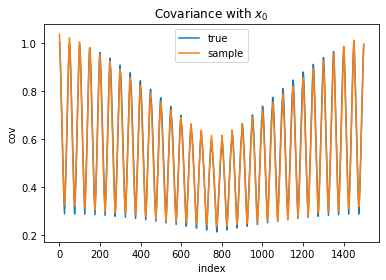

In [21]:
row = 0

plt.plot(prior_sampler.cov[row])
plt.plot(np.cov(X)[row])
plt.xlabel("index")
plt.ylabel("cov")
plt.title("Covariance with $x_0$")
plt.legend(["true","sample"])

In [22]:
Y = prior_sampler.gaussian_random_field(prior_sampler.mean, prior_sampler.cov, N=100000, nugget=0.0)

c:\Users\florianb\Documents\advectionDiffusion\Sampler.py:92: RuntimeWarning: covariance is not positive-semidefinite.
  sample = np.random.multivariate_normal(mean, cov + nugget*np.eye(self.grid.N_x), N).transpose()


In [23]:
np.linalg.norm(prior_sampler.cov-np.cov(Y))

42.72970893525939

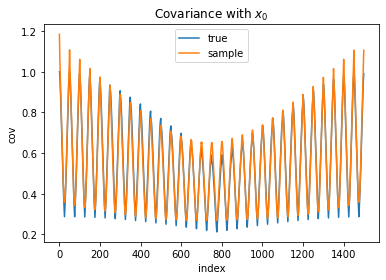

In [12]:
plt.plot(prior_sampler.cov[row])
plt.plot(np.cov(Y)[row])
plt.xlabel("index")
plt.ylabel("cov")
plt.title("Covariance with $x_0$")
plt.legend(["true","sample"])

## Checking Sampling Distribution

In [26]:
import scipy.stats

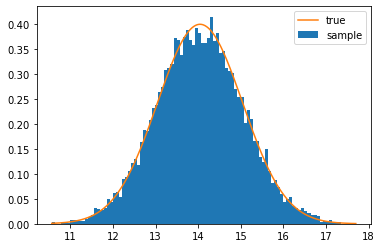

In [27]:
idx = 0

plt.hist(X[idx,:], density=True, bins=100)

x = np.arange(np.min(X[idx,:]),np.max(X[idx,:]),0.01)
density = scipy.stats.norm.pdf(x, loc=prior_sampler.mean[idx], scale=prior_sampler.stddev[idx])
plt.plot(x, density)

plt.legend(["true", "sample"])

plt.show()

In [28]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(X[idx,:])
cdf = lambda x: scipy.stats.norm.cdf(x, loc=prior_sampler.mean[idx], scale=prior_sampler.stddev[idx])

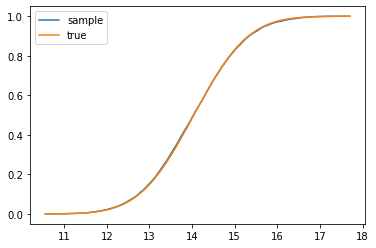

In [29]:
plt.plot(x,ecdf(x))
plt.plot(x,cdf(x))

plt.legend(["sample", "true"])
plt.show()

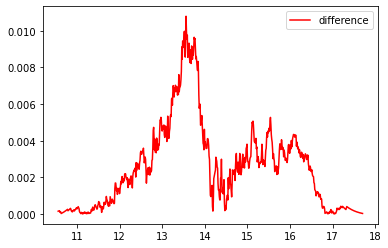

In [30]:
plt.plot(x, abs(ecdf(x)-cdf(x)), "r")
plt.legend(["difference"])

In [32]:
diff = lambda x: abs(cdf(x)-ecdf(x))
scipy.integrate.quad(diff, np.min(x), np.max(x), limit=100)[0]

<ipython-input-32-1b2248803ac9>:2: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  scipy.integrate.quad(diff, np.min(x), np.max(x), limit=100)[0]


0.01804105946068439

In [33]:
np.sum(diff(x))*(x[1]-x[0])

0.018038069683702123